## Study of the effect of national factors on home prices in the US
Task: Using publicly available data on the national factors that impact the supply and demand of homes in the US, build a data science model to study the effect of these variables on home prices.

Approach: The following variables are chosen for the study:

Unemployment Rate
Employment Rate
Per capita GDP
Median Household Income
Construction Prices
CPI
Interest Rates
The number of new houses supplied
Working Population
Urban Population
Percentage of population above 65
Housing subsidies
Number of Households
As a proxy for home prices, the S&P Case-Shiller Index is used.

Note: Most of the data is downloaded from [https://fred.stlouisfed.org/].

Data for all the variables is downloaded, preprocessed, and combined to create a dataset using the Extract Transform Load (ETL) method. Data for different variables had different frequencies. So, to combine the data, the necessary interpolations are made.

Importing neccessary libraries

In [160]:
import numpy as np
import pandas as pd



In [161]:
# Reading CASE-SHILLER Index into a dataframe
df_CS = pd.read_csv("CSUSHPISA.csv")



In [162]:
df_CS.head()

,DATE,CSUSHPISA
0,1/1/1987,63.963
1,2/1/1987,64.422
2,3/1/1987,64.734
3,4/1/1987,65.130
4,5/1/1987,65.562


In [163]:
# Reading CASE-SHILLER Index into a dataframe
df_CS = pd.read_csv("CSUSHPISA.csv")

# Changing dtype of date column
df_CS["DATE"] = pd.to_datetime(df_CS["DATE"])

# Selecting data till JULY 2023
mask = df_CS["DATE"] <= "2023-07-01"
df_CS = df_CS[mask]

#Resetting Index
df_CS.reset_index(inplace = True)
df_CS.drop(columns = ["index"], inplace = True)

# Creating "Year" and "Month" columns
df_CS["Year"] = pd.DatetimeIndex(df_CS["DATE"]).year
df_CS["Month"] = pd.DatetimeIndex(df_CS["DATE"]).month
print("Shape of the CASE-SHILLER Index:- ", df_CS.shape)
df_CS.tail()


Shape of the CASE-SHILLER Index:-  (439, 4)


,DATE,CSUSHPISA,Year,Month
434,2023-03-01,298.958,2023,3
435,2023-04-01,300.345,2023,4
436,2023-05-01,302.411,2023,5
437,2023-06-01,304.400,2023,6
438,2023-07-01,306.598,2023,7


In [164]:
# Reading Unemployment Rate Data into a dataframe
df_unemp = pd.read_csv("UNEMP.csv")
df_unemp.drop([259], inplace = True)
print("Unemployment Rate Data:- ", df_unemp.shape)
df_unemp.tail()

Unemployment Rate Data:-  (922, 2)


,DATE,LNS14000024
918,7/1/2024,3.9
919,8/1/2024,3.8
920,9/1/2024,3.6
921,10/1/2024,3.8
922,11/1/2024,3.9


In [165]:
# Reading Employment Rate Data into a dataframe
df_emp = pd.read_csv("EMPRATE.csv")
df_emp = df_emp.rename(columns={'LREM25MAUSA156S': 'EmpRate'})

print("shape of the Employment Rate Data:- ", df_emp.shape)
df_emp.tail()

shape of the Employment Rate Data:-  (69, 2)


,DATE,EmpRate
64,1/1/2019,86.42363
65,1/1/2020,81.79383
66,1/1/2021,83.64280
67,1/1/2022,85.85039
68,1/1/2023,86.27332


In [127]:
# Reading Per Capita GDP Data into a dataframe
df_pcgdp = pd.read_csv("GDP_PER_CAPITA.csv", names = ["DATE", "USARGDPC"], skiprows = 1)
df_pcgdp = df_pcgdp.rename(columns={'USARGDPC': 'Per_Capita_GDP'})
print("Shape of the Per Capita GDP Data:- ", df_pcgdp.shape)
df_pcgdp.tail()

Shape of the Per Capita GDP Data:-  (52, 2)


,DATE,Per_Capita_GDP
47,1/1/2007,49571
48,1/1/2008,48951
49,1/1/2009,47041
50,1/1/2010,47772
51,1/1/2011,48282


In [128]:
# Interest Rate Data
df_Fed_rate = pd.read_csv("FEDFUNDS.csv").drop([259])
print("Shape of the Interest rate data:- ",df_Fed_rate.shape)
df_Fed_rate.tail()

Shape of the Interest rate data:-  (845, 2)


,DATE,FEDFUNDS
841,8/1/2024,5.33
842,9/1/2024,5.13
843,10/1/2024,4.83
844,11/1/2024,4.64
845,12/1/2024,4.48


In [129]:
# Reading Construction Material Data into a dataframe
df_cons_price_index = pd.read_csv("CONS_MAT.csv", names = ["DATE", "WPUSI012011"], skiprows = 1)
df_cons_price_index = df_cons_price_index.rename(columns={'WPUSI012011': 'Cons_Material'})
df_cons_price_index.drop([259], inplace = True)
print("Shape of the Construction Material Data:- ", df_cons_price_index.shape)
df_cons_price_index.tail()

Shape of the Construction Material Data:-  (934, 2)


,DATE,Cons_Material
930,7/1/2024,325.556
931,8/1/2024,324.626
932,9/1/2024,324.032
933,10/1/2024,325.380
934,11/1/2024,327.047


In [130]:
# Consumer Price Index
df_CPI = pd.read_csv("CONSU_PRICE.csv", names = ["DATE", "CPIAUCSL"], skiprows = 1).drop([259])
df_CPI = df_CPI.rename(columns={'CPIAUCSL': 'CPI'})
print("Shape of the Consumer Price Index:- ", df_CPI.shape)
df_CPI.tail()

Shape of the Consumer Price Index:-  (934, 2)


,DATE,CPI
930,7/1/2024,313.534
931,8/1/2024,314.121
932,9/1/2024,314.686
933,10/1/2024,315.454
934,11/1/2024,316.441


In [131]:
# Monthly new house supply
df_house = pd.read_csv("NEW_HOUSE.csv", names = ["DATE", "MSACSR"], skiprows = 1).drop([259])
df_house = df_house.rename(columns={'MSACSR': 'Houses'})
print("Shape of the monthly house supply data:- ", df_house.shape)
df_house.tail()

Shape of the monthly house supply data:-  (742, 2)


,DATE,Houses
738,7/1/2024,7.9
739,8/1/2024,8.2
740,9/1/2024,7.7
741,10/1/2024,9.2
742,11/1/2024,8.9


In [132]:

df_oldpop = pd.read_csv("OLD_AGE.csv", names = ["DATE", "SPPOP65UPTOZSUSA"], skiprows = 1)
df_oldpop = df_oldpop.rename(columns={'SPPOP65UPTOZSUSA': 'old age '})

print("Shape of the population data age above 65:- ", df_oldpop.shape)
df_oldpop.tail()

Shape of the population data age above 65:-  (64, 2)


,DATE,old age
59,1/1/2019,15.672885
60,1/1/2020,16.071912
61,1/1/2021,16.473770
62,1/1/2022,16.919620
63,1/1/2023,17.431819


In [133]:
# Urban Population Percent

df_urban = pd.read_csv("POPU_GROWTH.csv")

print("Shape of the urban population percent data:- ", df_urban.shape)
df_urban.tail()

Shape of the urban population percent data:-  (63, 2)


,DATE,pop_growth
58,1/1/2019,0.455381
59,1/1/2020,0.969000
60,1/1/2021,0.157343
61,1/1/2022,0.367473
62,1/1/2023,0.491925


In [134]:
# Housing Subsidies

df_subsidy = pd.read_csv("HOUSE_SUB.csv", names = ["DATE", "Subsidy"], skiprows = 1)
print("Shape of the housing subsidies:- ", df_subsidy.shape)
df_subsidy.tail()

Shape of the housing subsidies:-  (64, 2)


,DATE,Subsidy
59,1/1/2019,40.185
60,1/1/2020,44.147
61,1/1/2021,45.299
62,1/1/2022,48.021
63,1/1/2023,53.573


In [135]:
df_working = pd.read_csv("WORKING_AGE.CSV" )

print("Shape of the working age population:- ", df_working.shape)
df_working.tail()

Shape of the working age population:-  (43, 2)


,DATE,WORKING AGE
38,1/1/2008,233788
39,1/1/2009,235801
40,1/1/2010,237830
41,1/1/2011,239618
42,1/1/2012,243284


In [136]:

df_income = pd.read_csv("REAL_HOUSE_ME.csv", names = ["DATE", "MEHOINUSA672N"], skiprows = 1)
df_income = df_income.rename(columns={'MEHOINUSA672N': 'median_income'})
print("Shape of the median household income data:- ", df_income.shape)
df_income.tail()

Shape of the median household income data:-  (40, 2)


,DATE,median_income
35,1/1/2019,81210
36,1/1/2020,79560
37,1/1/2021,79260
38,1/1/2022,77540
39,1/1/2023,80610


In [137]:
# Total number of households

df_households = pd.read_csv("TOTAL_HOUSEHOLD.csv", names = ["DATE", "TTLHH"], skiprows = 1)
df_households = df_households.rename(columns={'TTLHH': 'Num_Households'})
print("Shape of the total households data:- ", df_households.shape)
df_households.tail()

Shape of the total households data:-  (85, 2)


,DATE,Num_Households
80,1/1/2020,128451.0
81,1/1/2021,129224.0
82,1/1/2022,131202.0
83,1/1/2023,131434.0
84,1/1/2024,132216.0


In [169]:
# Merging Per Capita GDP (Quarterly data)
df_pcgdp["DATE"] = pd.to_datetime(df_pcgdp["DATE"])
df_CS = pd.merge(df_CS,df_pcgdp, how = "left")
df_CS.head()

,DATE,CSUSHPISA,Year,Month,Per_Capita_GDP
0,1987-01-01,63.963,1987,1,34114.0
1,1987-02-01,64.422,1987,2,NaN
2,1987-03-01,64.734,1987,3,NaN
3,1987-04-01,65.130,1987,4,NaN
4,1987-05-01,65.562,1987,5,NaN


In [191]:
# Concating dataframes having monthly data to create one dataframe
df = pd.DataFrame()
df_bymonth = [df_CS, df_working, df_house, df_CPI, df_unemp, df_emp, df_cons_price_index, df_Fed_rate]
for df1 in df_bymonth:
    df1["DATE"] = pd.to_datetime(df1["DATE"])
    df1 = df1.set_index("DATE")
    df = pd.concat([df,df1], axis = 1)
print(df.shape)
df.head()

(936, 11)


,CSUSHPISA,Year,Month,Per_Capita_GDP,WORKING AGE,Houses,CPI,LNS14000024,EmpRate,Cons_Material,FEDFUNDS
DATE,,,,,,,,,,,
1947-01-01,NaN,NaN,NaN,NaN,NaN,NaN,21.48,NaN,NaN,22.2,NaN
1947-02-01,NaN,NaN,NaN,NaN,NaN,NaN,21.62,NaN,NaN,22.5,NaN
1947-03-01,NaN,NaN,NaN,NaN,NaN,NaN,22.00,NaN,NaN,22.9,NaN
1947-04-01,NaN,NaN,NaN,NaN,NaN,NaN,22.00,NaN,NaN,23.2,NaN
1947-05-01,NaN,NaN,NaN,NaN,NaN,NaN,21.95,NaN,NaN,23.3,NaN


In [192]:
# List of DataFrames to merge
others = [df_urban, df_households, df_income, df_subsidy, df_oldpop]

# Iterate and merge DataFrames
for df1 in others:
    # Ensure Year column exists
    if "Year" not in df1.columns:
        df1["Year"] = pd.to_datetime(df1["DATE"]).dt.year
    # Set DATE as index (if not already done)
    if df1.index.name != "DATE":
        df1.set_index("DATE", inplace=True)
    # Merge on 'Year'
    df = pd.merge(df, df1, on="Year", how="left")

# Restore DATE column from df_CS
df["DATE"] = df_CS["DATE"]

# Set DATE as the final index
df.set_index("DATE", inplace=True)

# Preview the merged DataFrame
df.head()


,CSUSHPISA,Year,Month,Per_Capita_GDP,WORKING AGE,Houses,CPI,LNS14000024,EmpRate,Cons_Material,FEDFUNDS,pop_growth,Num_Households,median_income,Subsidy,old age
DATE,,,,,,,,,,,,,,,,
1987-01-01,NaN,NaN,NaN,NaN,NaN,NaN,21.48,NaN,NaN,22.2,NaN,NaN,NaN,NaN,NaN,NaN
1987-02-01,NaN,NaN,NaN,NaN,NaN,NaN,21.62,NaN,NaN,22.5,NaN,NaN,NaN,NaN,NaN,NaN
1987-03-01,NaN,NaN,NaN,NaN,NaN,NaN,22.00,NaN,NaN,22.9,NaN,NaN,NaN,NaN,NaN,NaN
1987-04-01,NaN,NaN,NaN,NaN,NaN,NaN,22.00,NaN,NaN,23.2,NaN,NaN,NaN,NaN,NaN,NaN
1987-05-01,NaN,NaN,NaN,NaN,NaN,NaN,21.95,NaN,NaN,23.3,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
print(df.shape)

(936, 16)


In [195]:
# Filling missing values in the Per_Capita_GDP column using linear interpolation
# Filling missing values in the Per_Capita_GDP column using linear interpolation
df["Per_Capita_GDP"] = df["Per_Capita_GDP"].interpolate()

In [201]:
df

,CSUSHPISA,Year,Month,Per_Capita_GDP,WORKING AGE,Houses,CPI,LNS14000024,EmpRate,Cons_Material,FEDFUNDS,pop_growth,Num_Households,median_income,Subsidy,old age
DATE,,,,,,,,,,,,,,,,
1987-01-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,21.480,3.0,94.31353,22.200,0.80,0.893829,89479.0,63060.0,11.506,11.990180
1987-02-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,21.620,3.0,94.31353,22.500,0.80,0.893829,89479.0,63060.0,11.506,11.990180
1987-03-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,22.000,3.0,94.31353,22.900,0.80,0.893829,89479.0,63060.0,11.506,11.990180
1987-04-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,22.000,3.0,94.31353,23.200,0.80,0.893829,89479.0,63060.0,11.506,11.990180
1987-05-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,21.950,3.0,94.31353,23.300,0.80,0.893829,89479.0,63060.0,11.506,11.990180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,306.598,2023.0,7.0,48282.0,243284.0,8.2,314.121,3.8,86.27332,324.626,5.33,0.491925,131434.0,80610.0,53.573,17.431819
NaT,306.598,2023.0,7.0,48282.0,243284.0,7.7,314.686,3.6,86.27332,324.032,5.13,0.491925,131434.0,80610.0,53.573,17.431819
NaT,306.598,2023.0,7.0,48282.0,243284.0,9.2,315.454,3.8,86.27332,325.380,4.83,0.491925,131434.0,80610.0,53.573,17.431819


In [216]:
df.fillna(0, inplace=True)  # Replace NaN with 0
df.fillna('missing', inplace=True)  # Replace NaN with a string



In [217]:
df.dropna(inplace = True)

In [218]:
df.isna().sum()

CSUSHPISA         0
Year              0
Month             0
Per_Capita_GDP    0
WORKING AGE       0
Houses            0
CPI               0
LNS14000024       0
EmpRate           0
Cons_Material     0
FEDFUNDS          0
pop_growth        0
Num_Households    0
median_income     0
Subsidy           0
old age           0
dtype: int64

In [223]:
df


,CSUSHPISA,Year,Month,Per_Capita_GDP,WORKING AGE,Houses,CPI,LNS14000024,EmpRate,Cons_Material,FEDFUNDS,pop_growth,Num_Households,median_income,Subsidy,old age
DATE,,,,,,,,,,,,,,,,
1987-01-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,21.480,3.0,94.31353,22.200,0.80,0.893829,89479.0,63060.0,11.506,11.990180
1987-02-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,21.620,3.0,94.31353,22.500,0.80,0.893829,89479.0,63060.0,11.506,11.990180
1987-03-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,22.000,3.0,94.31353,22.900,0.80,0.893829,89479.0,63060.0,11.506,11.990180
1987-04-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,22.000,3.0,94.31353,23.200,0.80,0.893829,89479.0,63060.0,11.506,11.990180
1987-05-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,21.950,3.0,94.31353,23.300,0.80,0.893829,89479.0,63060.0,11.506,11.990180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,306.598,2023.0,7.0,48282.0,243284.0,8.2,314.121,3.8,86.27332,324.626,5.33,0.491925,131434.0,80610.0,53.573,17.431819
NaT,306.598,2023.0,7.0,48282.0,243284.0,7.7,314.686,3.6,86.27332,324.032,5.13,0.491925,131434.0,80610.0,53.573,17.431819
NaT,306.598,2023.0,7.0,48282.0,243284.0,9.2,315.454,3.8,86.27332,325.380,4.83,0.491925,131434.0,80610.0,53.573,17.431819


In [224]:
print("Shape of the dataframe after preprocessing:- ", df.shape)

Shape of the dataframe after preprocessing:-  (936, 16)


In [225]:
df.to_csv("prepared_dataset.csv")

In [226]:
us_house_price_df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
us_house_price_df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,WORKING AGE,Houses,CPI,LNS14000024,EmpRate,Cons_Material,FEDFUNDS,pop_growth,Num_Households,median_income,Subsidy,old age
DATE,,,,,,,,,,,,,,,,
1987-01-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,21.48,3.0,94.31353,22.2,0.8,0.893829,89479.0,63060.0,11.506,11.99018
1987-02-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,21.62,3.0,94.31353,22.5,0.8,0.893829,89479.0,63060.0,11.506,11.99018
1987-03-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,22.00,3.0,94.31353,22.9,0.8,0.893829,89479.0,63060.0,11.506,11.99018
1987-04-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,22.00,3.0,94.31353,23.2,0.8,0.893829,89479.0,63060.0,11.506,11.99018
1987-05-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,21.95,3.0,94.31353,23.3,0.8,0.893829,89479.0,63060.0,11.506,11.99018


# US Housing Trends Analyzer and Influence Explorer building a data scince model 

es

In [227]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [228]:
us_house_price_df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
us_house_price_df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,WORKING AGE,Houses,CPI,LNS14000024,EmpRate,Cons_Material,FEDFUNDS,pop_growth,Num_Households,median_income,Subsidy,old age
DATE,,,,,,,,,,,,,,,,
1987-01-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,21.48,3.0,94.31353,22.2,0.8,0.893829,89479.0,63060.0,11.506,11.99018
1987-02-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,21.62,3.0,94.31353,22.5,0.8,0.893829,89479.0,63060.0,11.506,11.99018
1987-03-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,22.00,3.0,94.31353,22.9,0.8,0.893829,89479.0,63060.0,11.506,11.99018
1987-04-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,22.00,3.0,94.31353,23.2,0.8,0.893829,89479.0,63060.0,11.506,11.99018
1987-05-01,63.963,1987.0,1.0,34114.0,137085.0,4.7,21.95,3.0,94.31353,23.3,0.8,0.893829,89479.0,63060.0,11.506,11.99018


In [229]:
# Dropping year and month columns
us_house_price_df.drop(columns = ["Year", "Month"], inplace = True)

### Exploratory Data Analysis (EDA)
Summary Statistics: 
Calculate and display summary statistics for each variable, including mean, median, standard deviation, minimum, and maximum values. This gives you an overview of the data's central tendencies and variability.

In [230]:
# Summary statistics
summary_stats = us_house_price_df.describe()
summary_stats

,CSUSHPISA,Per_Capita_GDP,WORKING AGE,Houses,CPI,LNS14000024,EmpRate,Cons_Material,FEDFUNDS,pop_growth,Num_Households,median_income,Subsidy,old age
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,104.565924,39162.294872,183411.371795,5.843910,121.518196,4.973932,89.279729,116.101951,4.243173,0.891198,100608.448718,66105.512821,20.164154,12.667490
std,62.586729,6251.832201,41451.135987,1.600977,87.091313,1.616077,3.859970,82.130866,3.572841,0.195462,14678.637060,5062.290825,11.573955,1.355401
min,63.963000,34114.000000,137085.000000,3.300000,21.480000,2.200000,80.962490,22.200000,0.050000,0.157343,89479.000000,61150.000000,11.506000,11.990180
25%,63.963000,34114.000000,137085.000000,4.700000,32.432500,3.800000,86.423630,34.400000,1.010000,0.893829,89479.000000,63060.000000,11.506000,11.990180
50%,63.963000,34114.000000,179396.500000,5.400000,109.000000,4.700000,88.987705,107.450000,3.835000,0.893829,89479.000000,63060.000000,11.506000,11.990180
75%,141.548750,47307.000000,226082.000000,6.600000,194.000000,5.925000,93.023310,169.175000,5.902500,0.921713,113343.000000,68340.000000,27.651000,12.405360
max,306.598000,49571.000000,243284.000000,12.200000,316.441000,14.200000,94.715640,353.015000,19.100000,1.386886,131434.000000,81210.000000,53.573000,17.431819


#### Correlation Analysis:
Calculate the correlation matrix to measure the linear relationships between variables.

In [231]:
# Correlation matrix
corr_matrix = us_house_price_df.corr()
corr_matrix

,CSUSHPISA,Per_Capita_GDP,WORKING AGE,Houses,CPI,LNS14000024,EmpRate,Cons_Material,FEDFUNDS,pop_growth,Num_Households,median_income,Subsidy,old age
CSUSHPISA,1.000000,0.870805,0.820708,0.210347,0.884934,-0.040739,-0.662242,0.921760,-0.351003,-0.623849,0.943121,0.939267,0.963302,0.906420
Per_Capita_GDP,0.870805,1.000000,0.936555,0.083327,0.928621,0.078443,-0.797717,0.883968,-0.429735,-0.378896,0.965027,0.822913,0.912600,0.666834
WORKING AGE,0.820708,0.936555,1.000000,0.193608,0.986517,0.236839,-0.919797,0.948274,-0.238946,-0.287031,0.920756,0.765407,0.892058,0.669557
Houses,0.210347,0.083327,0.193608,1.000000,0.214568,0.197030,-0.246910,0.274493,0.444464,-0.145517,0.124103,0.103537,0.172994,0.176119
CPI,0.884934,0.928621,0.986517,0.214568,1.000000,0.178453,-0.888279,0.983238,-0.236578,-0.357978,0.943619,0.828951,0.940090,0.766915
LNS14000024,-0.040739,0.078443,0.236839,0.197030,0.178453,1.000000,-0.558962,0.152664,0.060932,0.101991,0.066909,-0.133310,0.055782,-0.059017
EmpRate,-0.662242,-0.797717,-0.919797,-0.246910,-0.888279,-0.558962,1.000000,-0.850210,0.164480,0.208912,-0.789854,-0.574926,-0.766614,-0.545602
Cons_Material,0.921760,0.883968,0.948274,0.274493,0.983238,0.152664,-0.850210,1.000000,-0.196508,-0.454600,0.931991,0.855579,0.951232,0.838024
FEDFUNDS,-0.351003,-0.429735,-0.238946,0.444464,-0.236578,0.060932,0.164480,-0.196508,1.000000,0.246772,-0.441203,-0.302126,-0.397373,-0.296046
pop_growth,-0.623849,-0.378896,-0.287031,-0.145517,-0.357978,0.101991,0.208912,-0.454600,0.246772,1.000000,-0.525055,-0.611523,-0.512527,-0.677970


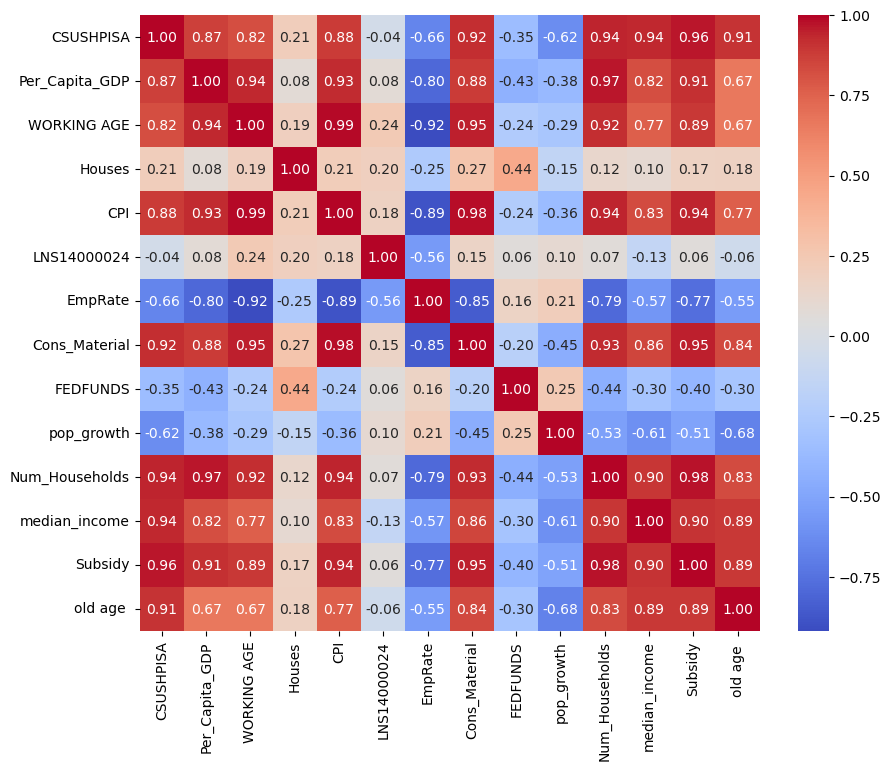

In [232]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## Time Series Analysis:
For time-dependent variables like 'CSUSHPISA,' use time series decomposition to separate trends, seasonality, and residuals. Plot these components to understand the patterns over time.

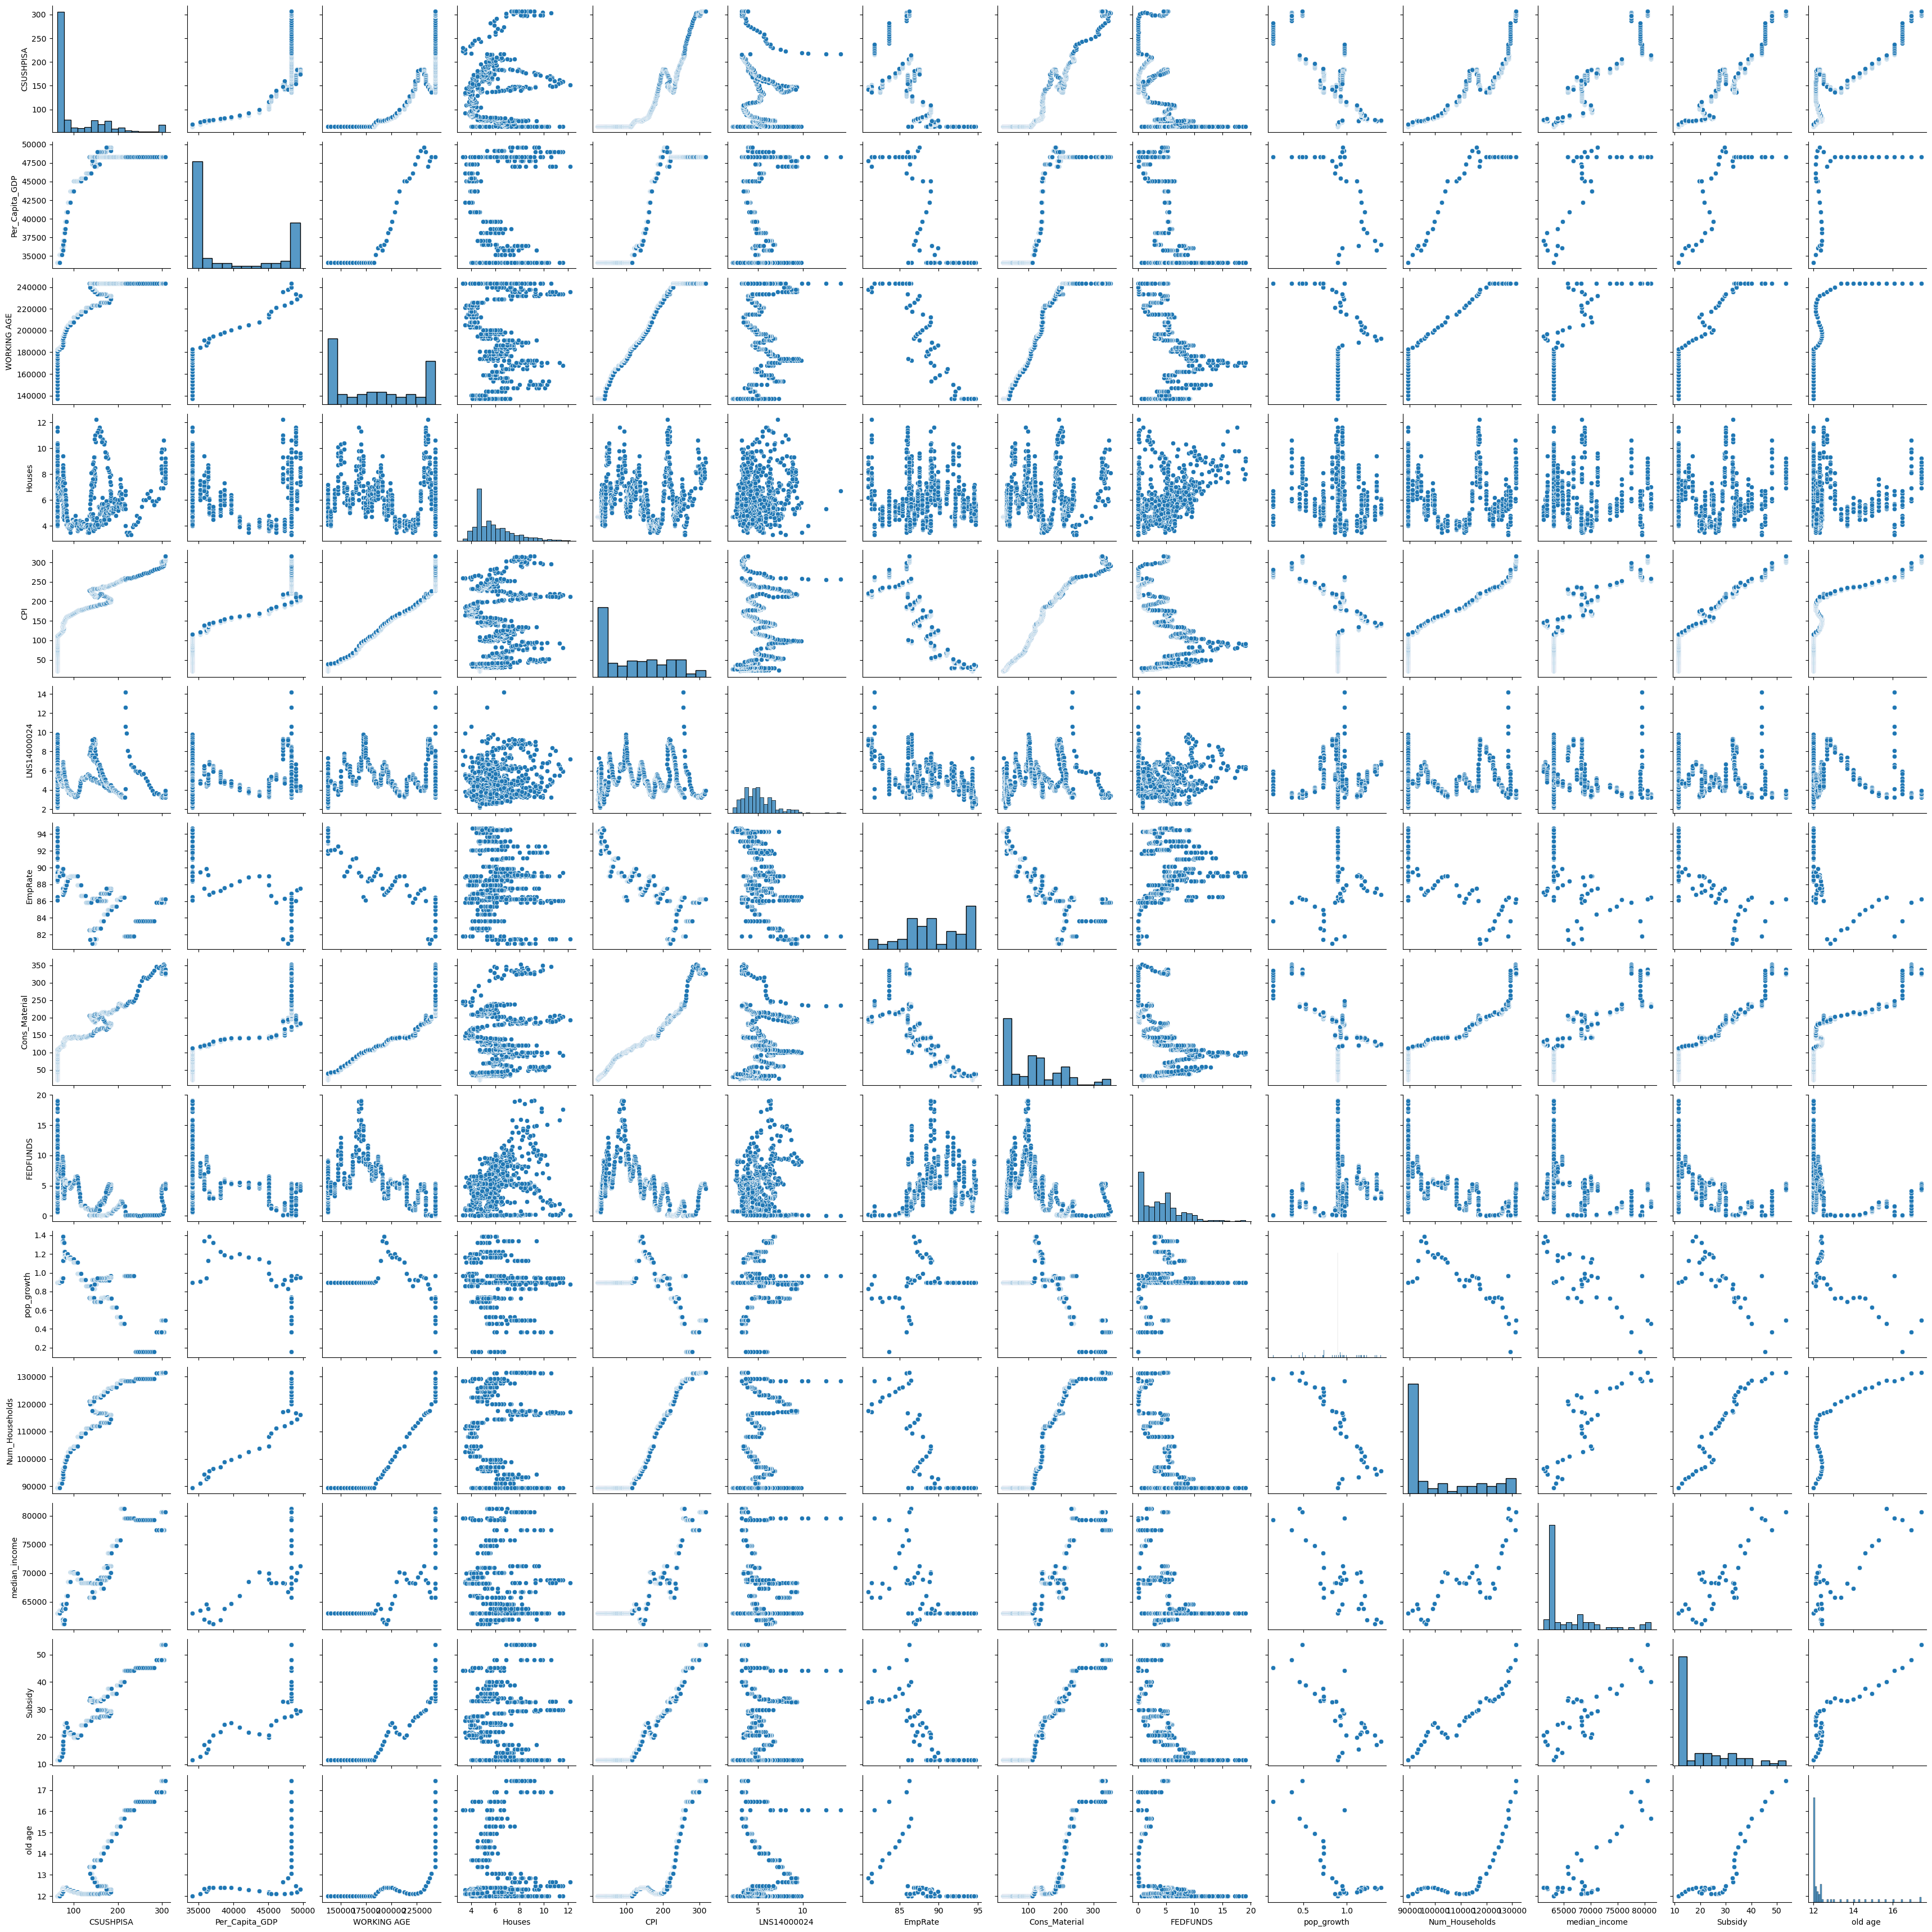

In [236]:
sns.pairplot(us_house_price_df)

In [237]:
us_house_price_df.columns

Index(['CSUSHPISA', 'Per_Capita_GDP', 'WORKING AGE', 'Houses', 'CPI',
       'LNS14000024', 'EmpRate', 'Cons_Material', 'FEDFUNDS', 'pop_growth',
       'Num_Households', 'median_income', 'Subsidy', 'old age '],
      dtype='object')

In [238]:
factors = ['CSUSHPISA', 'UNRATE', 'Per_Capita_GDP', 'FEDFUNDS', 'Cons_Material', 'CPI', 'Houses', 'Num_Households', 'old_age_pop', 'urban_pop_us', 'Subsidy', 'working_age_pop', 'median_income']

In [242]:
plt.figure(figsize=(130, 80))

plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

<Figure size 13000x8000 with 0 Axes>

In [244]:
# Separating the target variable and the independent variable
y = us_house_price_df.pop("CSUSHPISA")
X = us_house_price_df

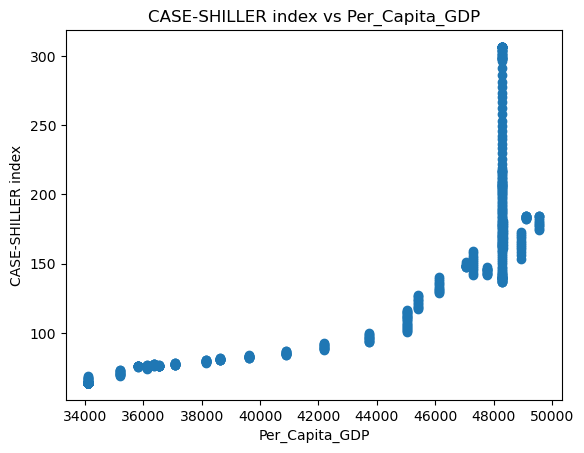

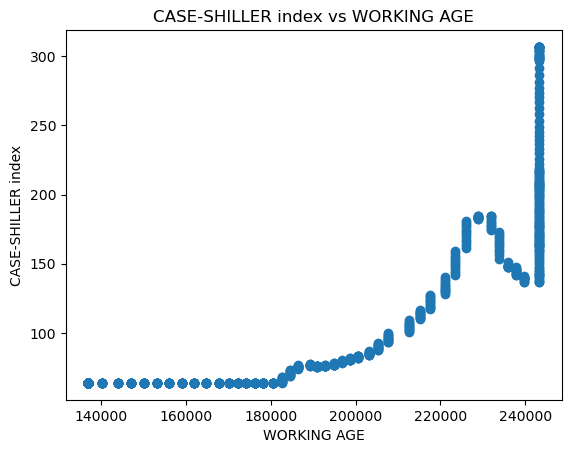

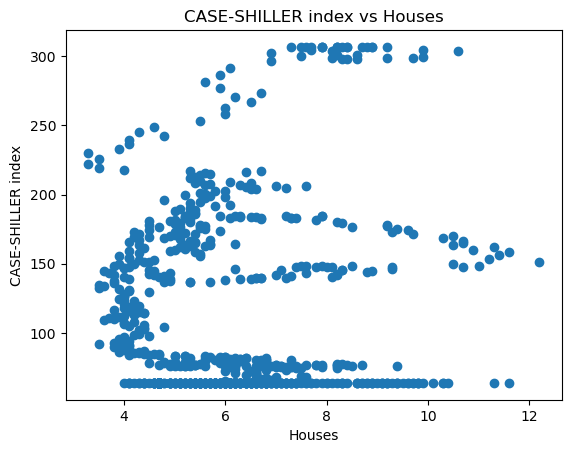

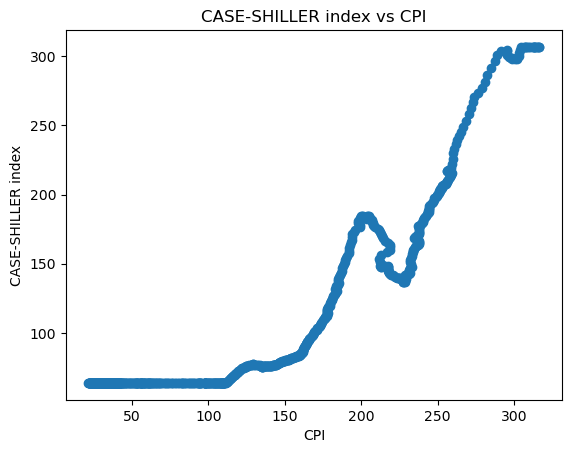

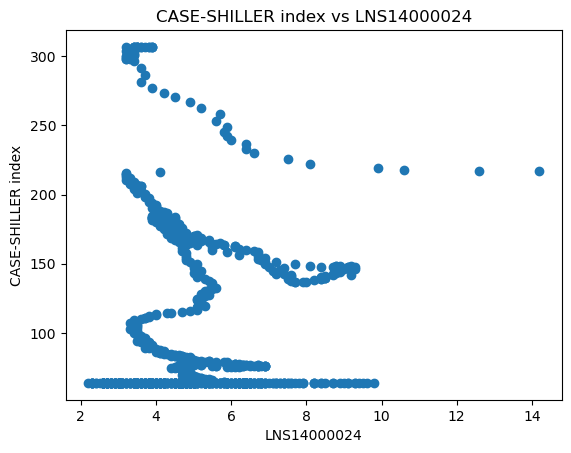

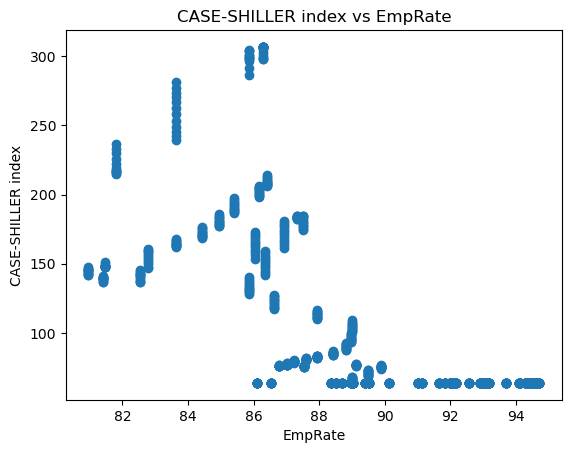

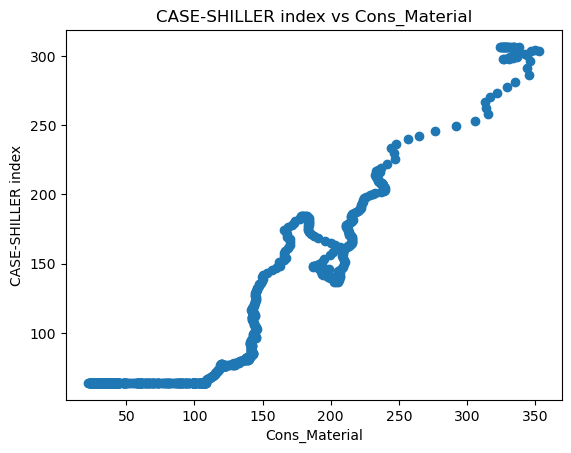

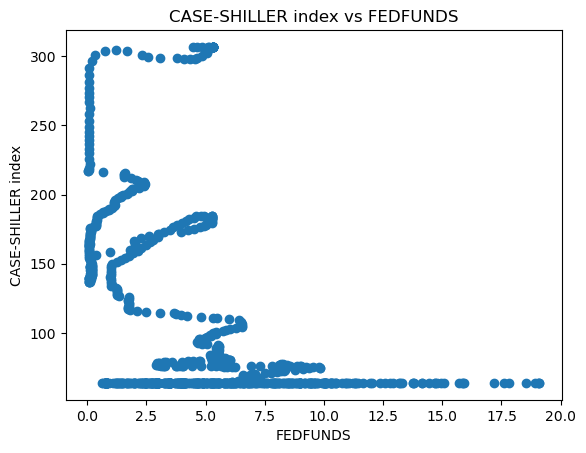

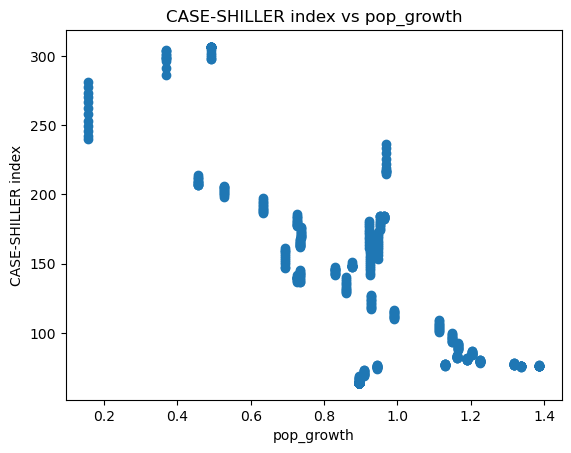

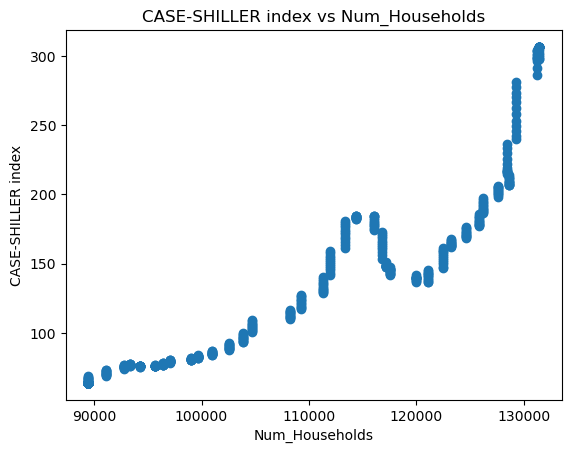

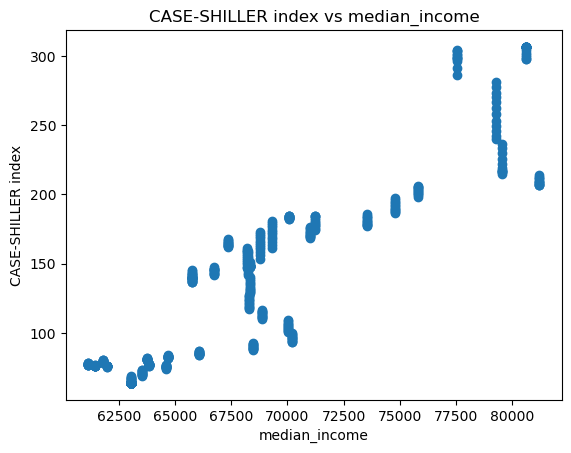

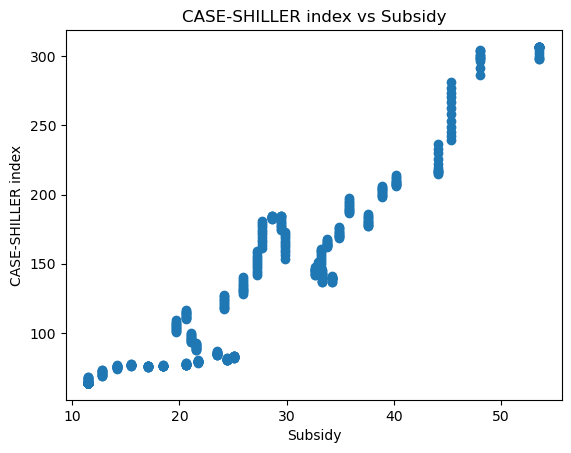

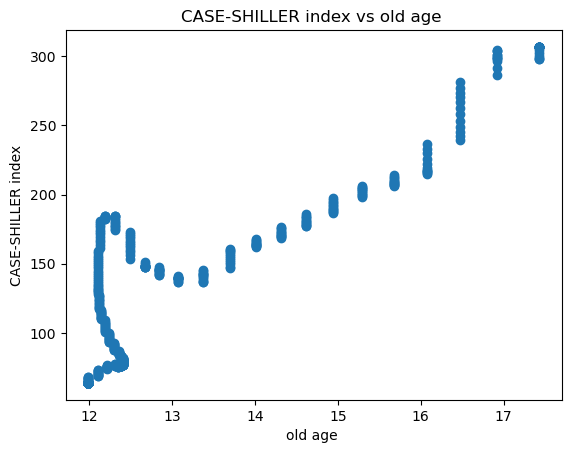

In [245]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

In [246]:
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
LNS14000024       0.040739
Houses            0.210347
FEDFUNDS          0.351003
pop_growth        0.623849
EmpRate           0.662242
WORKING AGE       0.820708
Per_Capita_GDP    0.870805
CPI               0.884934
old age           0.906420
Cons_Material     0.921760
median_income     0.939267
Num_Households    0.943121
Subsidy           0.963302
dtype: float64


In [ ]:
Highest Correlation:
Subsidy (0.963302) has the strongest correlation with the target.
Strong Correlations:
Num_Households (0.943121) and median_income (0.939267) are also highly correlated.
Moderate Correlations:
Features like Cons_Material (0.921760), old age (0.906420), and CPI (0.884934) show moderate influence.
Lower Correlations:
pop_growth (0.623849) and FEDFUNDS (0.351003) have weaker correlations, while Houses (0.210347) and LNS14000024 (0.040739) show minimal correlation.


Data science models

In [255]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

Models building

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [258]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Explored various regression models, including Linear Regression, ElasticNet, Random Forest, Gradient Boosting, Support Vector Regression (SVR), and XGBoost.

In [251]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

Model: Linear Regression
Mean Squared Error: 64.5303726077181
R-squared: 0.9851848567860697
Coefficients:
Per_Capita_GDP: 10.970308352750402
WORKING AGE: -60.34958827570259
Houses: 2.344834809496303
CPI: 11.621174014310325
LNS14000024: 2.741400527628396
EmpRate: 9.611710140334946
Cons_Material: 62.91684803229953
FEDFUNDS: -2.1433493500055527
pop_growth: -1.5741533604314624
Num_Households: 29.512643167156575
median_income: 13.48224154646123
Subsidy: 9.00147594468722
old age : -14.104383345269818
Intercept: 104.0210320855615

Model: ElasticNet
Mean Squared Error: 180.5369400965593
R-squared: 0.9585516011321562
Coefficients:
Per_Capita_GDP: 5.994886005876131
WORKING AGE: 2.836877901543229
Houses: 2.906840161712286
CPI: 4.968287913718453
LNS14000024: -2.890726043799643
EmpRate: -0.0
Cons_Material: 6.96277038214432
FEDFUNDS: -2.226477497191957
pop_growth: -6.182327786372323
Num_Households: 6.68605178725339
median_income: 9.27381814836038
Subsidy: 8.455139578220127
old age : 8.65091292575448

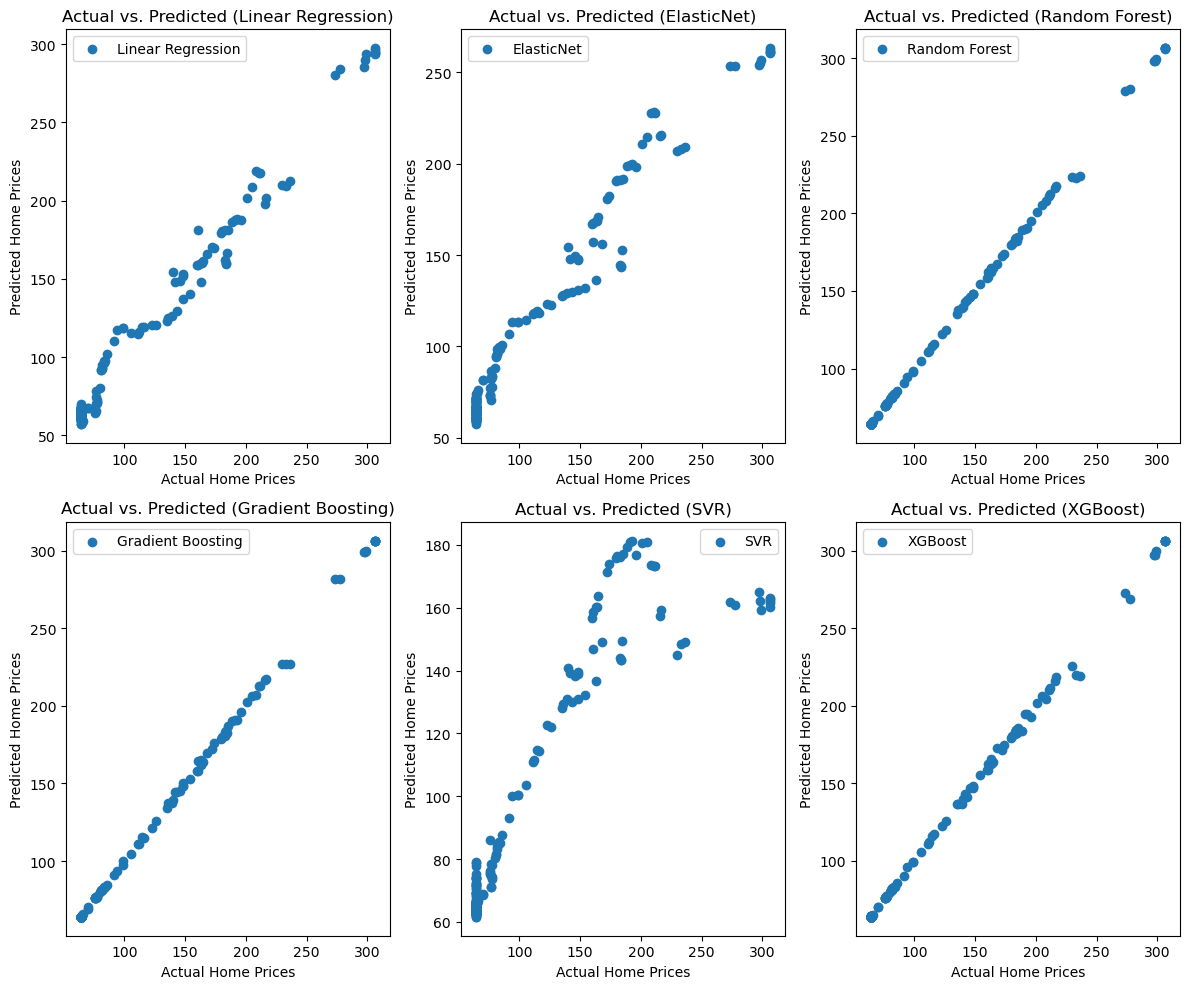


Best Model: GradientBoostingRegressor with MSE: 1.6915624398509435


In [252]:
best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")
        
        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model
    
    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")

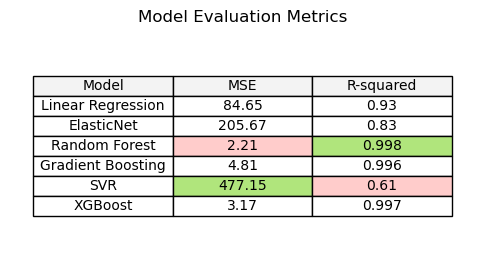

In [253]:
# Assuming you have a DataFrame with model names and their corresponding evaluation metrics
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'MSE': [84.65, 205.67, 2.21, 4.81, 477.15, 3.17],
    'R-squared': [0.93, 0.83, 0.998, 0.996, 0.61, 0.997]
}

df = pd.DataFrame(data)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 3)) 

# Hide the axes
ax.axis('off')

# Create a table and add data
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center', colColours=['#f3f3f3']*len(df.columns), colWidths=[0.25]*len(df.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the table size if needed

# Highlight specific values (e.g., minimum and maximum MSE)
min_mse_index = np.argmin(df['MSE'])
max_mse_index = np.argmax(df['MSE'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df.columns.get_loc('MSE'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df['R-squared'])
max_r2_index = np.argmax(df['R-squared'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()

## Decision:

Random Forest and XGBoost appear to be strong contenders, as they have low MSE and high R-squared values. Additionally, both models provide insights into feature importance.

Gradient Boosting also performs well but with a slightly higher MSE compared to Random Forest and XGBoost.

Linear Regression and ElasticNet have higher MSE values, indicating potential limitations in predictive accuracy.

SVR has a considerably higher MSE and lower R-squared, suggesting lower performance compared to other models.

Champion model: In summary, based on the provided metrics, Random Forest appear to be a strong candidate for the best model, with a low MSE and a high R-squared value.

Low MSE: The low MSE indicates that the model's predictions are close to the actual values on average, suggesting good predictive accuracy.

High R-squared: The high R-squared value suggests that a significant portion of the variance in home prices is explained by the model. This indicates strong explanatory power.

Feature Importance: The feature importance analysis provides transparency into the factors driving the predictions. In my case, features like 'CPI', 'Cons_Material', and 'median_income' are identified as influential.

This means that, according to the model, changes in these features have a notable impact on the predictions of U.S. home prices. For example, if 'CPI' increases, it suggests that changes in the cost of living might influence home prices.

Understanding feature importance is crucial for making informed decisions, refining models, and gaining insights into the factors driving the predictions, which is especially valuable in fields like economics, finance, or real estate where interpretability is essential.